# TensorFlow for signal detection

**First read in data from hdf5 format and convert to numpy arrays**

In [35]:
# Some common imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import imresize
import get_h5data
import h5py
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
crfs = get_h5data.read_data_sets("crfs_data", one_hot=True, dtype=tf.uint8)

Extracting crfs_data/sample_train_gzip.h5
Extracting crfs_data/sample_train_gzip.h5
Extracting crfs_data/sample_test_gzip.h5
Extracting crfs_data/sample_test_gzip.h5


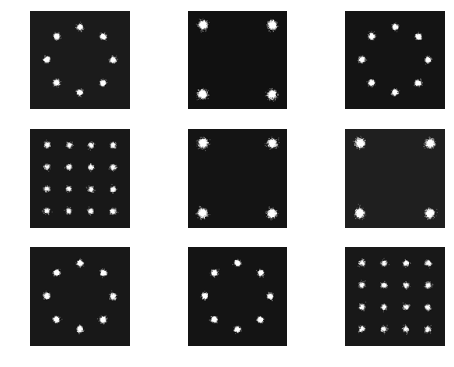

In [266]:
#Visualize a few random examples
fig, ax = plt.subplots(3,3, figsize=(8, 6))
for i in range(3):
    for j in range(3):
        ax[i][j].set_axis_off()
        ax[i][j].imshow(crfs.train.next_batch(1)[0].reshape(128,128),cmap='Greys')

## A one layer (fully connected) neural network

In [261]:
import tensorflow as tf

#initialize an interactive session 
#(allowing flexiblity in defining and running graph )
sess = tf.InteractiveSession()

#create nodes for the computational graph. None indicates a placeholder variable
x = tf.placeholder(tf.float32, shape=[None, 16384])
y_ = tf.placeholder(tf.float32, shape=[None, 3])

#define the variables of the computational (single layer) neural network
W = tf.Variable(tf.zeros([16384,3]))
b = tf.Variable(tf.zeros([3]))

#initialize the variables within this session
sess.run(tf.initialize_all_variables())

#Compute softmax probabilities for each class
y = tf.nn.softmax(tf.matmul(x,W) + b)

#Use cross entropy as a cost function. 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


#Define the training step
train_step = tf.train.GradientDescentOptimizer(0.0000005).minimize(cross_entropy)


#Now do 1000 training steps, each with a batch size of 50.
# we use batch/stochastic gradient descent.
for i in range(500):
    batch = crfs.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print ("Accuracy: ",accuracy.eval(feed_dict={x: crfs.test.images, y_: crfs.test.labels}))

('Accuracy: ', 1.0)


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x1c70c2390>> ignored
